In [257]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load the DataSet 

In [258]:
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
44424,Male,32.0,0,0,former,29.67,6.6,90,0
2214,Female,19.0,0,0,never,21.32,6.2,130,0
72325,Male,21.0,0,0,never,22.43,4.8,140,0
95656,Male,55.0,0,0,current,49.03,7.5,140,1
48587,Female,70.0,1,0,never,36.55,4.0,160,0
69976,Male,80.0,1,0,never,23.52,6.5,85,0
57822,Male,23.0,0,0,current,20.36,4.5,155,0
8062,Male,44.0,1,0,not current,31.43,7.0,159,1
21116,Female,66.0,0,0,ever,27.32,6.6,130,0
66465,Female,37.0,0,0,never,30.07,6.2,85,0


In [259]:
data.shape

(100000, 9)

#####  Check for missing Values

In [260]:
## First check null entries
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


##### Check for Outliers

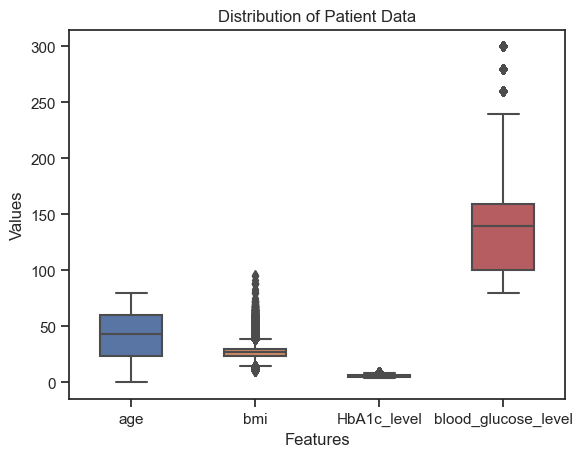

In [262]:
import seaborn as sns

sns.set(style='ticks')
# Create the plot
data_subset = data[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
sns.boxplot(data=data_subset, orient='v', width=0.5)

# Add labels and titles
plt.title('Distribution of Patient Data')
plt.ylabel('Values')
plt.xlabel('Features')

# Show the plot
plt.show()


##### check for duplicate rows

In [263]:
data.drop_duplicates(inplace=True)
data.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
81494,Female,79.00,1,0,never,36.85,6.1,130,0
52368,Male,11.00,0,0,No Info,18.33,5.7,126,0
19165,Female,80.00,0,0,never,29.20,5.8,100,0
17138,Female,44.00,0,0,No Info,34.36,4.8,90,0
20523,Male,11.00,0,0,No Info,25.11,6.1,126,0
50025,Female,0.72,0,0,No Info,18.38,4.5,100,0
20967,Female,72.00,0,0,No Info,23.04,6.1,158,0
80380,Male,6.00,0,0,No Info,17.30,4.0,80,0
16688,Female,25.00,0,0,never,21.74,5.0,145,0
79292,Male,59.00,0,0,not current,23.72,6.0,160,0


In [264]:
data['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

##### Encoding Gender Column

In [265]:
# Convert smoking history to numerical format
gender_mapping = {'Female': 0, 'Male': 1, 'Other': 2}
data['gender'] = data['gender'].map(gender_mapping)
data['gender']

0        0
1        0
2        1
3        0
4        1
        ..
99994    0
99996    0
99997    1
99998    0
99999    0
Name: gender, Length: 96146, dtype: int64

##### Smoking History

In [266]:
data['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [267]:
# Convert smoking history to numerical format
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
data['smoking_history'] = data['smoking_history'].map(smoking_history_mapping)
data['smoking_history']

0        0
1       -1
2        0
3        2
4        2
        ..
99994   -1
99996   -1
99997    1
99998    0
99999    2
Name: smoking_history, Length: 96146, dtype: int64

In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


<AxesSubplot: >

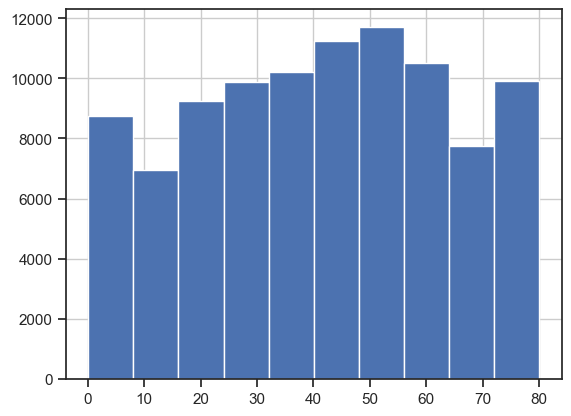

In [269]:
data['age'].hist()

In [270]:
## convert age column datatype to int
data['age'] = data['age'].astype(int)
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,-1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,2,23.45,5.0,155,0
4,1,76,1,1,2,20.14,4.8,155,0


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  int32  
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 7.0 MB


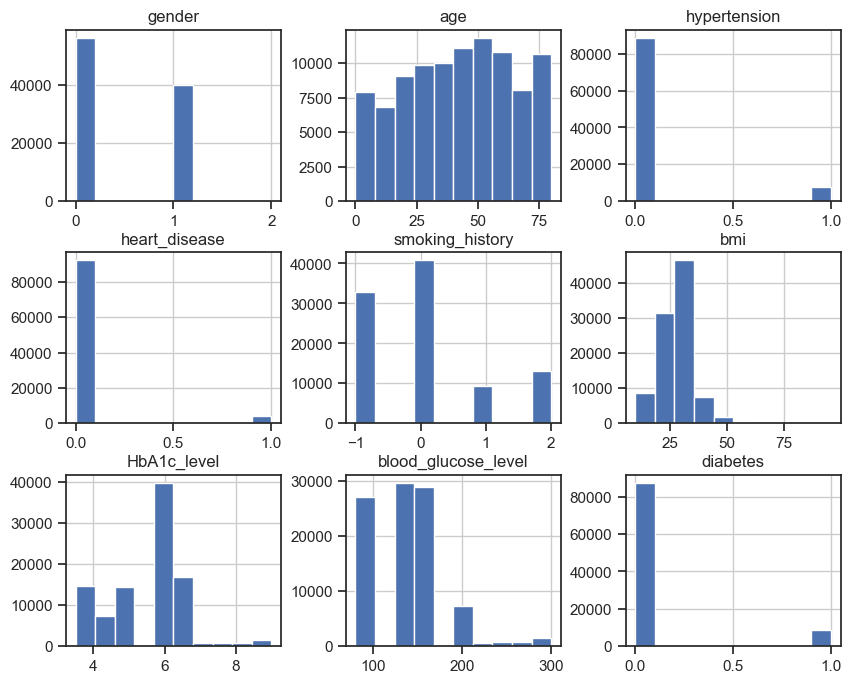

In [272]:
data.hist(bins=10, figsize=(10,8))
plt.show()

In [273]:
diabetes_mapping = {0: "Not Diabetic", 1 : "Diabetic"}
data['diabetes'] = data['diabetes'].map(diabetes_mapping)
data['diabetes']

0        Not Diabetic
1        Not Diabetic
2        Not Diabetic
3        Not Diabetic
4        Not Diabetic
             ...     
99994    Not Diabetic
99996    Not Diabetic
99997    Not Diabetic
99998    Not Diabetic
99999    Not Diabetic
Name: diabetes, Length: 96146, dtype: object

In [274]:
X = data.drop(columns=['diabetes'], axis=1)
y = data['diabetes']

In [275]:
data['diabetes'].value_counts()

Not Diabetic    87664
Diabetic         8482
Name: diabetes, dtype: int64

In [276]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [277]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=0)

In [278]:
X_train_scaled = pd.DataFrame(SC.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_train_scaled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
67080,1.184356,-0.213329,-0.288884,-0.206870,0.971273,-0.260008,0.898651,-0.297640
18184,-0.843206,0.678645,-0.288884,-0.206870,-0.033764,-1.045778,-0.963329,0.410529
34535,-0.843206,0.723244,-0.288884,-0.206870,0.971273,0.623798,-0.684032,0.483788
65490,-0.843206,-1.239098,-0.288884,-0.206870,-0.033764,-0.975965,0.433156,0.410529
18881,-0.843206,-1.239098,-0.288884,-0.206870,-1.038801,-0.001550,0.246958,-1.298844
...,...,...,...,...,...,...,...,...
21442,1.184356,0.277257,-0.288884,-0.206870,-1.038801,1.119918,0.153859,-0.932550
46806,-0.843206,1.392225,-0.288884,4.833955,0.971273,0.654992,-1.428824,-0.297640
43413,-0.843206,1.080034,-0.288884,-0.206870,0.971273,2.030462,0.619354,0.044235
44393,1.184356,-1.595888,-0.288884,-0.206870,-1.038801,-1.828578,0.991751,0.044235


In [279]:
SC.var_, SC.scale_

(array([2.43249321e-01, 5.02754187e+02, 7.10929469e-02, 3.93547080e-02,
        9.90000922e-01, 4.53231190e+01, 1.15374453e+00, 1.67695937e+03]),
 array([ 0.49320312, 22.42218069,  0.26663261,  0.19838021,  0.9949879 ,
         6.73224472,  1.07412501, 40.95069433]))

In [280]:
X_test_scaled = pd.DataFrame(SC.transform(X_test), columns = X_test.columns, index = X_test.index)
X_test_scaled

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
77645,1.184356,0.901639,-0.288884,-0.20687,0.971273,0.100942,-1.894320,1.509411
68911,1.184356,0.767843,-0.288884,-0.20687,-0.033764,1.127345,1.177949,3.462980
4123,-0.843206,1.392225,-0.288884,-0.20687,-0.033764,-0.776923,-1.428824,-0.932550
50172,1.184356,0.946238,-0.288884,-0.20687,-0.033764,-0.169399,1.364147,0.044235
71861,1.184356,-0.347125,-0.288884,-0.20687,0.971273,0.998116,0.153859,-1.420942
...,...,...,...,...,...,...,...,...
97564,-0.843206,-0.659315,-0.288884,-0.20687,-0.033764,-0.713051,0.153859,0.166333
18418,1.184356,0.455652,-0.288884,-0.20687,1.976311,-0.871988,-1.894320,-1.176746
39124,-0.843206,-0.124131,-0.288884,-0.20687,-1.038801,0.497540,0.991751,-0.297640
26075,-0.843206,0.054264,-0.288884,-0.20687,1.976311,-0.001550,0.246958,-1.420942


### Training KNN Classifier

In [281]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [282]:
y_test_pred = knn_classifier.predict(X_test_scaled)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.959644986825683

### Training Logistic Regression

In [283]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [284]:
y_test_pred = lr_classifier.predict(X_test_scaled)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9589862709748994

### Training Naive Bayes 

In [285]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [286]:
y_test_pred = nb_classifier.predict(X_test_scaled)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9012272916377756

### Training Decision Tree

In [287]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth = 3)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

In [288]:
y_test_pred = dt_classifier.predict(X_test_scaled)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9719179032034392

### Training Support Vector Classifier 

In [289]:
from sklearn.svm import SVC
sv_classifier = SVC()
sv_classifier.fit(X_train_scaled, y_train)

SVC()

In [290]:
y_test_pred = sv_classifier.predict(X_test_scaled)
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_test_pred)

0.9638746359728193

### Saving the Model (Serialization) 

In [291]:
from pickle import dump

dump(SC, open('models/standard_scaler.pkl', 'wb'))
dump(knn_classifier, open('models/knn_model.pkl', 'wb'))
dump(lr_classifier, open('models/lr_model.pkl', 'wb'))
dump(nb_classifier, open('models/nb_model.pkl', 'wb'))
dump(dt_classifier, open('models/dt_model.pkl', 'wb'))
dump(sv_classifier, open('models/sv_model.pkl', 'wb'))